Understanding the pytorch

In [1]:
import torch

x = torch.tensor([5,7])

y = torch.tensor([7,5])

print(x*y)

tensor([35, 35])


In [2]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [3]:
x.shape

torch.Size([2, 5])

In [4]:
y =  torch.rand([2,5])
y

tensor([[0.9179, 0.8499, 0.8729, 0.6476, 0.1441],
        [0.7176, 0.1252, 0.0091, 0.5866, 0.0865]])

In [5]:
y.view([1,10])

tensor([[0.9179, 0.8499, 0.8729, 0.6476, 0.1441, 0.7176, 0.1252, 0.0091, 0.5866,
         0.0865]])

Importing the data 

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

In [5]:
for data in trainsets:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = data[0][0], data[1][0]
print(y)

tensor(3)


In [7]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


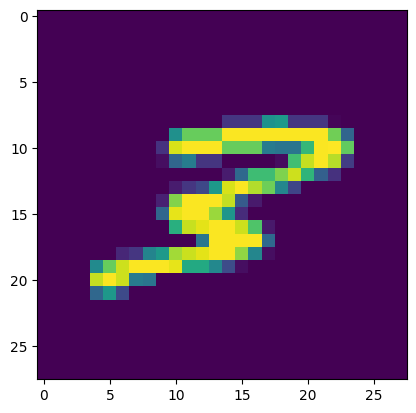

In [8]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [15]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainsets:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Building the neural network

In [9]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)


In [10]:
import torch.nn as nn
import torch.nn.functional as F


In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( 28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [17]:
ouput = net(X)
print(ouput)

tensor([[-2.3953, -2.3034, -2.2612, -2.2989, -2.3674, -2.2113, -2.3400, -2.4062,
         -2.2313, -2.2331]], grad_fn=<LogSoftmaxBackward0>)


Training Model
